In [28]:
from matplotlib import pyplot as plt
import autograd.numpy as np
from autograd.scipy.special import expit, logit
import pandas as pd
plt.style.use('bmh')

import pandas as pd

In [29]:
pd.set_option('display.max_rows',100)

In [11]:
??logit

In [18]:
N = 200
U = np.random.rand(N)
T = -(logit(-np.log(U) / 0.5) - np.random.exponential(2, N) - 6.00) / 0.50

In [23]:
E = ~np.isnan(T)
T[np.isnan(T)] = 50

Text(0.5, 1.0, 'Survival function estimated by KaplanMeier')

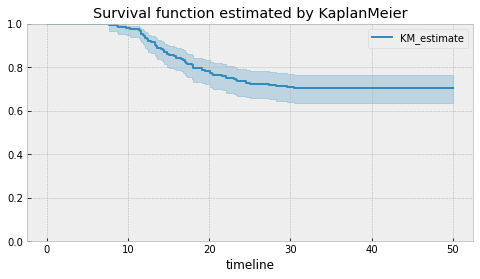

In [25]:
from lifelines import KaplanMeierFitter
kmf = KaplanMeierFitter().fit(T, E)
kmf.plot(figsize=(8,4))
plt.ylim(0, 1);
plt.title("Survival function estimated by KaplanMeier")

In [30]:
kmf.event_table

,removed,observed,censored,entrance,at_risk
event_at,,,,,
0.000000,0,0,0,200,200
7.649622,1,1,0,0,200
8.645795,1,1,0,0,199
8.691878,1,1,0,0,198
9.770928,1,1,0,0,197
10.193451,1,1,0,0,196
11.301152,1,1,0,0,195
11.467556,1,1,0,0,194
11.568565,1,1,0,0,193


# Customer Model

In [32]:
from autograd.scipy.stats import norm
from lifelines.fitters import ParametricUnivariateFitter


class UpperAsymptoteFitter(ParametricUnivariateFitter):

    _fitted_parameter_names = ["c_", "mu_", "sigma_"]

    _bounds = ((0, None), (None, None), (0, None))

    def _cumulative_hazard(self, params, times):
        c, mu, sigma = params
        return c * norm.cdf((times - mu) / sigma, loc=0, scale=1)
    
uaf = UpperAsymptoteFitter()

<lifelines.UpperAsymptoteFitter:"UpperAsymptote_estimate", fitted with 42 total observations, 12 right-censored observations>
   number of observations = 42
number of events observed = 30
           log-likelihood = -118.60
               hypothesis = c_ != 1, mu_ != 0, sigma_ != 1

---
         coef   se(coef)   coef lower 95%   coef upper 95%    z      p   -log2(p)
c_       1.63       0.36             0.94             2.33 1.78   0.07       3.75
mu_     13.44       1.73            10.06            16.82 7.79 <0.005      47.07
sigma_   7.03       1.07             4.94             9.12 5.65 <0.005      25.91
---
AIC = 243.20

---
Estimated lower bound: 0.20 (0.10, 0.10)


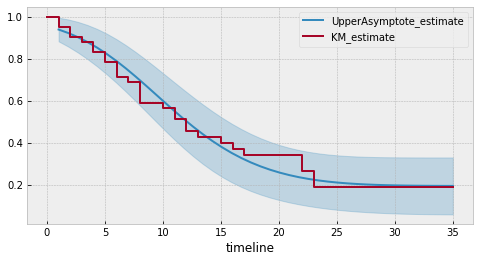

In [33]:
from lifelines.datasets import load_leukemia, load_kidney_transplant

T, E = load_leukemia()['t'], load_leukemia()['status']
uaf.fit(T, E)
ax = uaf.plot_survival_function(figsize=(8,4))
uaf.print_summary()

kmf.fit(T, E).plot(ax=ax, ci_show=False)
print("---")
print("Estimated lower bound: {:.2f} ({:.2f}, {:.2f})".format(
        np.exp(-uaf.summary.loc['c_', 'coef']),
        np.exp(-uaf.summary.loc['c_', 'coef upper 95%']),
        np.exp(-uaf.summary.loc['c_', 'coef upper 95%']),
    )
)